In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pylab as pb
import pandas as pd
import GPy

In [3]:
df = pd.read_csv('fulldf.csv',encoding = 'unicode_escape') # getting full data set 
sparse_df = df[['_chemical_formula_weight']] # only considering one feature
# ,'_space_group_IT_number', '_symmetry_cell_setting','num_atoms'

bg_avg = np.mean(df['bandgaps']) # band gap mean
df['bandgaps'] = df['bandgaps'].subtract(bg_avg) # shifting band gaps

X = sparse_df[:5000] 
Y = df['bandgaps'][:5000]


In [4]:
y = Y.values.tolist()
s = [[i] for i in y]
Y = np.array(s)

In [5]:
print(X.shape, Y.shape)

(5000, 1) (5000, 1)


In [6]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.) # using RBF kernel 
m = GPy.models.GPRegression(X,Y,kernel) 

In [7]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


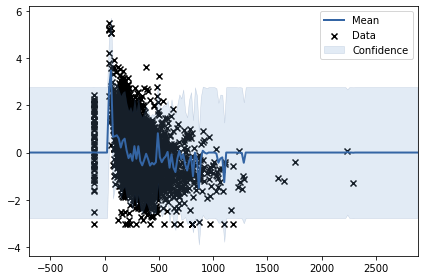

In [8]:
fig = m.plot()

In [ ]:
m.optimize(messages=True)
#m.optimize_restarts(num_restarts = 10)

In [ ]:
display(m)
#fig = m.plot(plot_density = True)
fig = m.plot()

In [ ]:
x_test = X.values.tolist()
s_test = [i for i in x_test]
X_test = np.array(s_test)

In [ ]:
# Xnew
X_new = sparse_df[11000:]
X_ = X_new.values.tolist()
temp = [i for i in X_]
X_newtest = np.array(temp)
X_newtest
mean, var = m.predict(X_newtest)

In [ ]:
new_df = df[['bandgaps','_chemical_formula_weight','_space_group_IT_number', '_symmetry_cell_setting', '_symmetry_space_group_name_H-M',
         '_cell_angle_alpha', '_cell_angle_beta', '_cell_angle_gamma', '_diffrn_reflns_theta_full',
         '_diffrn_reflns_theta_max', '_diffrn_reflns_theta_min', '_exptl_absorpt_coefficient_mu',
         '_exptl_absorpt_correction_T_max', '_exptl_absorpt_correction_T_min', 'num_atoms']]
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
space_vals_temp = df['_symmetry_space_group_name_H-M']
new_df['_symmetry_space_group_name_H-M'] = space_vals_temp.astype(str)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(new_df['_symmetry_space_group_name_H-M'])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
space_vals_encoded = onehot_encoder.fit_transform(integer_encoded)
new_df['_symmetry_space_group_name_H-M'] = integer_encoded

In [ ]:
X = new_df.drop(['bandgaps'], axis=1)[:5000]
Y = new_df['bandgaps'][:5000]

In [ ]:
y = Y.values.tolist()
s = [[i] for i in y]
Y = np.array(s)

In [ ]:
# define kernel
kernel = GPy.kern.RBF(input_dim=14, variance=1., lengthscale=1.) # using RBF kernel  

# create simple GP model
m = GPy.models.GPRegression(X,Y,kernel)

In [ ]:
# optimize and plot
x_test_all = np.array([i for i in X[11000:].values.tolist()])
m.optimize(messages=True,max_f_eval = 1000)


In [ ]:
x_test_all = np.array([i for i in new_df.drop(['bandgaps'], axis=1)[11000:].values.tolist()])
mean_all, var_all = m.predict(x_test_all)

In [ ]:
print(mean_all, var_all)

In [ ]:
y_test=df['bandgaps'][11000:]

mse = (np.square(y_test - mean_all)).mean()
print(mse)
print(np.sqrt(mse))
mae= np.abs(y_test-mean_all).mean()
print(mae)